In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import keras
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

def char_to_vocab (sentence):
    vocabulary = ['а','б','в','г','д','е','ё','ж','з','и','й','к','л','м','н','о','п','р','с','т','у','ф','х','ц','ч','ш','щ','ъ','ы','ь','э','ю','я',
              'А','Б','В','Г','Д','Е','Ё','Ж','З','И','Й','К','Л','М','Н','О','П','Р','С','Т','У','Ф','Х','Ц','Ч','Ш','Щ','Ъ','Ы','Ь','Э','Ю','Я',
             '!','@','#','$','%','^','&','*','(',')',':',';','/',',','.','%','№','?','~','-','+','=',' ',
              'a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z',
             'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
    result = []
    for char in sentence:
        if char in vocabulary:
            result.append(vocabulary.index(char)+1)
            
    result = np.array(result)
    #encoded = one_hot(sentence)
    if len(result)<500:
        result = np.concatenate((result, np.zeros(500-result.shape[0])))
    if len(result)>500:
        result = result[:500]
    return result

def all_to_vocab(comments):
    X_train_new = []
    for sentence in tqdm(comments):
        X_train_new.append(char_to_vocab(sentence))
    X_train_new = np.array(X_train_new)
    return X_train_new


def predict(model, X, y, bins = 50):
    y_pred = model.predict(X)
    y_pred = np.clip(y_pred, 1, 5)
    
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    medianae = median_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print('MSE:{};  MAE:{};  MedianAE:{};  R2 Score:{}.'.format(mse, mae, medianae, r2))
    plt.figure(figsize=(20,5))
    plt.plot(y_pred[::bins])
    plt.plot(y[::bins])
    plt.show()

Using TensorFlow backend.


In [2]:
#загрузка данных и модели. Для загрузки своих данных введите путь до вашего csv файла (в нем должны содержаться колонки с названиями reting, comment)
data = pd.read_csv('data/reviews_test.csv')
X_test = data.comment.values
y_test = data.reting.values
X_test = all_to_vocab(X_test)
model = keras.models.load_model('models/NN_1_score_1.035-0.55')

100%|██████████| 3103/3103 [00:01<00:00, 1957.53it/s]
/home/user/anaconda3/envs/tf/lib/python3.6/site-packages/keras/engine/topology.py:1252: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  return cls(**config)


MSE:1.0244752584298644;  MAE:0.7630899583605694;  MedianAE:0.6162128448486328;  R2 Score:0.4067448130948619.


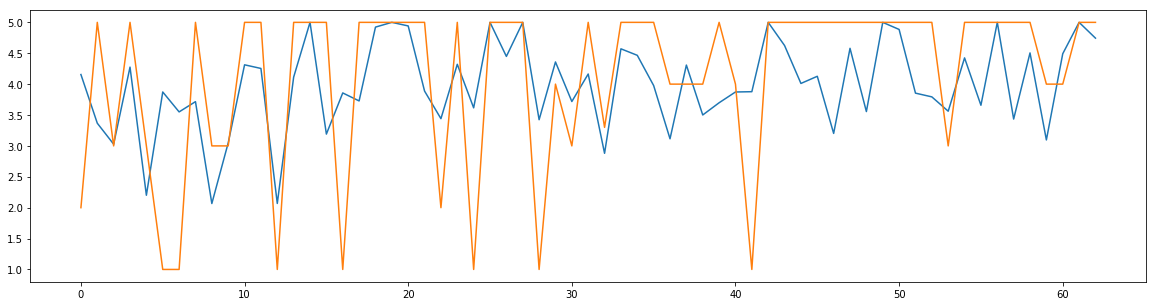

In [3]:
# на данном этапе выводятся результаты, для видеокарты с 4ГБ памяти максимальное количество коментариев 3000!
predict(model, X_test, y_test)
